In [ ]:
!pip install ultralytics
!pip install Pillow
!pip install wandb
!pip install os

In [ ]:
from ultralytics import YOLO
from PIL import Image
import wandb
import os

os.environ["WANDB_PROJECT"] = "yolo-microplastic"
os.environ["WANDB_NOTEBOOK_NAME "] = "UMFO"
# os.environ["WANDB_API_KEY"] = "ENTER_KEY"

wandb.login()

In [ ]:
yolo = YOLO('yolov8n.pt')
yolo.train(data='./datasets/data.yaml', epochs=5)
valid_results = yolo.val()


image 1/1 /home/asamek/UMFO/datasets/valid/images/a--26-_jpg.rf.0ae749f9f22dbfa00f0889c68594bdc9.jpg: 640x640 5 Microplastics, 23.6ms
Speed: 4.0ms preprocess, 23.6ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


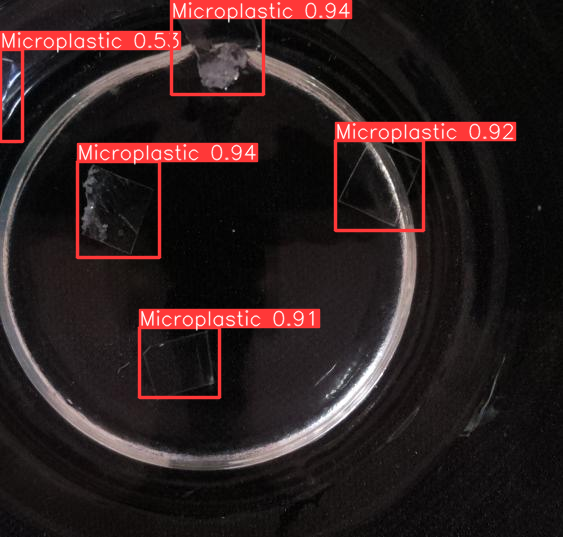

In [15]:
def predict(yolo, image_path, iou=0.5):
    results = yolo(image_path, iou=iou)
    res = results[0].plot()[:, :, [2,1,0]]
    return Image.fromarray(res)

yolo = YOLO('runs/detect/train/weights/best.pt')

image_path = './datasets/valid/images/a--26-_jpg.rf.0ae749f9f22dbfa00f0889c68594bdc9.jpg'
predict(yolo, image_path)